# Face Detection

This notebook contains code for face detection using RetinaFace. RetinaFace is a deep learning based cutting-edge facial detector for Python coming with facial landmarks.

## Installation

First, we install required packages and import them.

In [1]:
%pip install retina-face imutils opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Download test images/videos

We download test images and videos from unsplash and pexels.

In [2]:
# Download test images from unsplash, see README for attributions
!rm -f *.jpeg
!curl -L https://images.unsplash.com/photo-1625990637351-ee0e5e9ba5e5 -o test1.jpeg
!curl -L https://images.unsplash.com/photo-1542304074-9c8ce93b52fd -o test2.jpeg
!curl -L https://images.unsplash.com/photo-1523151401668-fff9e38a48e4 -o test3.jpeg

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 23.0M  100 23.0M    0     0   195M      0 --:--:-- --:--:-- --:--:--  195M
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 2269k  100 2269k    0     0  50.3M      0 --:--:-- --:--:-- --:--:-- 50.3M
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1513k  100 1513k    0     0  41.0M      0 --:--:-- --:--:-- --:--:-- 41.0M


In [3]:
# Download test video from pexels, see README for attributions
!rm -f *.mp4
!curl -L https://download.pexels.com/vimeo/374178490/pexels-fauxels-3254006.mp4?width=3840 -o test.mp4

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 28.7M  100 28.7M    0     0  13.9M      0  0:00:02  0:00:02 --:--:-- 13.9M


In [4]:
# create a outputs folder to store the results
!rm -fr outputs/
!mkdir -p outputs/

## Imports

We import required packages.

In [5]:
import os
from pathlib import Path

import cv2 as cv
import imutils
import numpy as np
from IPython.display import Image, Video
from retinaface import RetinaFace
from tqdm import tqdm

## Face Detection

Here we perform face detection a sample image and see the results.

In [6]:
img_path = "test3.jpeg"
faces = RetinaFace.detect_faces(img_path)

In [7]:
faces

{'face_1': {'score': 0.9994465708732605,
  'facial_area': [395, 991, 951, 1653],
  'landmarks': {'right_eye': [494.87036, 1342.3364],
   'left_eye': [682.2634, 1188.5786],
   'nose': [617.51666, 1400.2311],
   'mouth_right': [653.5598, 1540.2614],
   'mouth_left': [815.9429, 1411.0553]}},
 'face_2': {'score': 0.9990968704223633,
  'facial_area': [2261, 819, 2834, 1619],
  'landmarks': {'right_eye': [2332.5842, 1146.277],
   'left_eye': [2577.05, 1111.5703],
   'nose': [2404.9163, 1278.7517],
   'mouth_right': [2365.9873, 1396.4031],
   'mouth_left': [2609.7034, 1367.1409]}},
 'face_3': {'score': 0.9989867806434631,
  'facial_area': [3723, 651, 4291, 1458],
  'landmarks': {'right_eye': [3927.5027, 963.5183],
   'left_eye': [4176.8433, 999.8292],
   'nose': [4065.9973, 1126.0173],
   'mouth_right': [3894.135, 1207.6283],
   'mouth_left': [4143.554, 1240.3746]}}}

## Helper Functions

These function help us perform face detection and then draw rectangles around the detected faces.

In [8]:
def visualize(image, results, box_color=(0, 255, 0), text_color=(0, 0, 255)):
    """
    This function takes an image and the results of face detection and draws bounding boxes around the detected faces.
    It also adds the confidence score of each detection as text to the image.

    Parameters:
    image (numpy.ndarray): The input image.
    results (dict): The results of face detection. It should be a dictionary with keys as face detection indices and values as dictionaries containing the facial area and score.
    box_color (tuple): The color of the bounding box. Default is (0, 255, 0) which is green.
    text_color (tuple): The color of the text. Default is (0, 0, 255) which is red.

    Returns:
    numpy.ndarray: The output image with bounding boxes and confidence scores added.
    """
    output = image.copy()
    # loop over the detected faces
    for det in results.values():
        # draw bounding box
        bbox = det["facial_area"]
        cv.rectangle(output, (bbox[0], bbox[1]), (bbox[2], bbox[3]), box_color, 2)

        # add confidence score
        conf = det["score"]
        cv.putText(
            output,
            "{:.4f}".format(conf),
            (bbox[0], bbox[1] + 12), # bottom left corner of text
            cv.FONT_HERSHEY_DUPLEX, # font face
            0.5, # font scale
            text_color, # font color
        )

    return output

In [9]:
def detect_face(input_image):
    """
    This function takes an input image, performs face detection on it using RetinaFace, and displays the results.
    It also saves the output image with bounding boxes and confidence scores added to the outputs folder.

    Parameters:
    input_image (str): The path to the input image.

    Returns:
    None
    """
    # Convert input image to Path object
    input_image = Path(input_image)

    # Read input image
    image = cv.imread(os.fspath(input_image))

    # Reduce size of image to make it easier to process and display
    image = imutils.resize(image, width=1000)

    # Perform face detection on the image
    results = RetinaFace.detect_faces(np.array(image))

    # Print number of faces detected
    print("{} faces detected.".format(len(results)))

    # Draw bounding boxes and confidence scores on the input image
    image = visualize(image, results)

    # Save output image with bounding boxes and confidence scores added to the outputs folder
    out_image = input_image.parent / 'outputs' / (input_image.stem + "_result.jpeg")
    cv.imwrite(os.fspath(out_image), image)

    # Display the output image
    display(Image(filename=os.fspath(out_image)))

## Face Detection on Images

Now, we use the helper functions to perform face detection on a few test images.

15 faces detected.


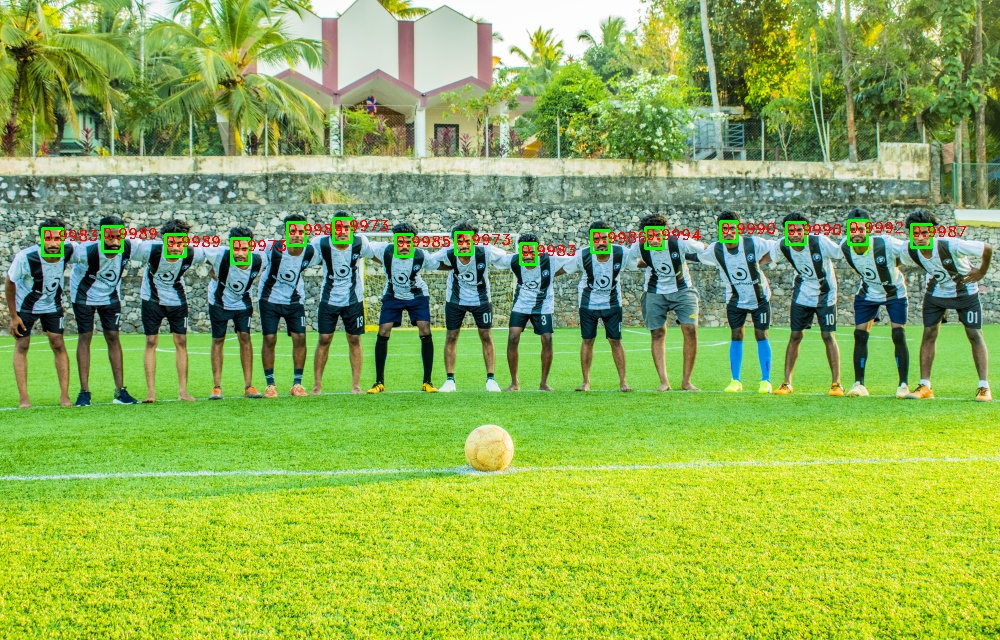

In [10]:
detect_face("test1.jpeg")

3 faces detected.


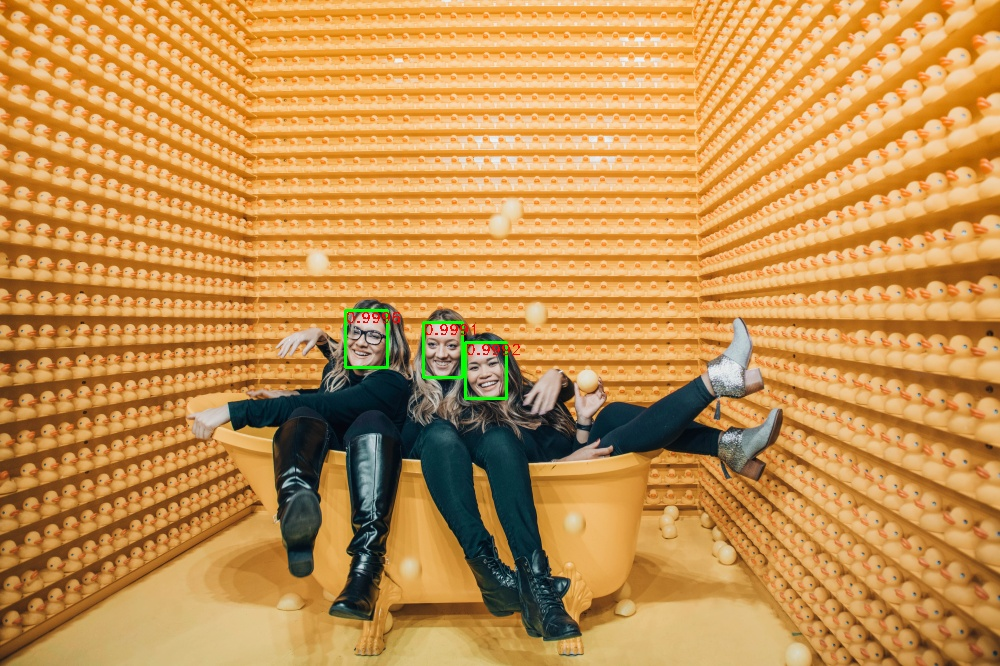

In [11]:
detect_face("test2.jpeg")

3 faces detected.


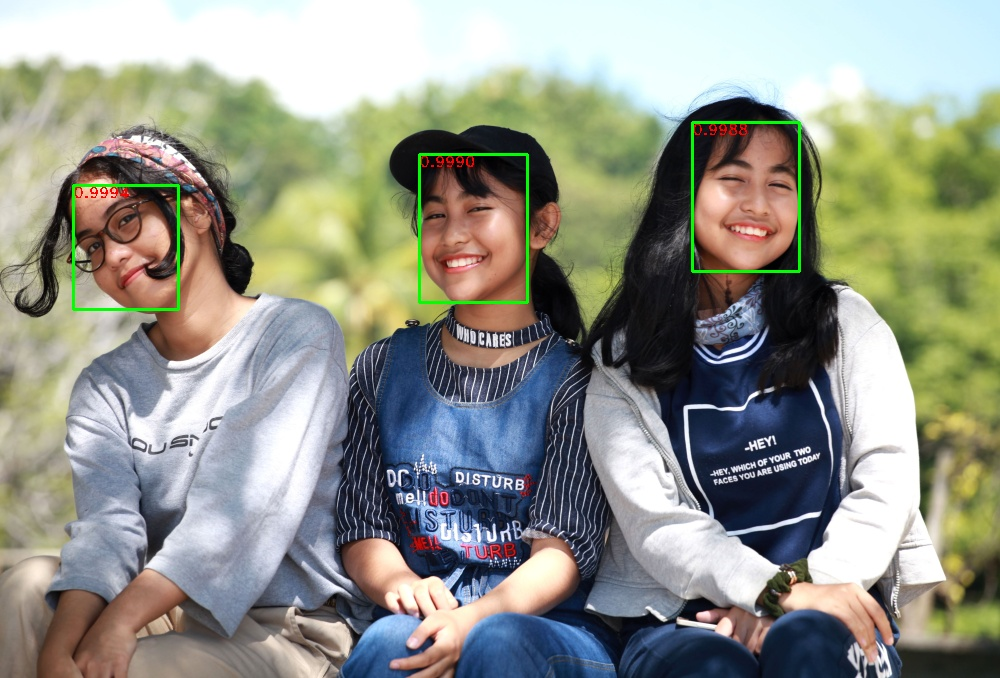

In [12]:
detect_face("test3.jpeg")

## Face Detection on Videos

Now, we use the helper functions to perform face detection on a few test videos. We also save the output videos.

Here, opencv is used to read and write videos, frame by frame.

In [13]:
# reduce quality (to predict the output faster)
!ffmpeg -i test.mp4 -vf scale=640:360 test-quality-reduce.mp4 -y

# trim the video to the first 4 seconds
!ffmpeg -ss 0 -i test-quality-reduce.mp4 -c copy -t 4 test-trim.mp4 -y

ffmpeg version 4.2.7-0ubuntu0.1 Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 9 (Ubuntu 9.4.0-1ubuntu1~20.04.1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-avresample --disable-filter=resample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librsvg --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --e

In [14]:
cap = cv.VideoCapture("test-trim.mp4")

In [15]:
# Define the codec and create a VideoWriter object to save the output video
fourcc = cv.VideoWriter_fourcc(*"VP90")
out = cv.VideoWriter("outputs/output.mp4", fourcc, 30.0, (int(cap.get(3)), int(cap.get(4))))

In [16]:
# Get the current frame position and total number of frames in the video
pos_frame = int(cap.get(cv.CAP_PROP_POS_FRAMES))
num_frames = int(cap.get(cv.CAP_PROP_FRAME_COUNT))

# Loop through each frame in the video from the current position to the end
for frame_no in tqdm(range(pos_frame, num_frames)):
    # Read the next frame from the video
    ret, frame = cap.read()
    if not ret:
        break

    # Detect faces in the current frame using RetinaFace
    results = RetinaFace.detect_faces(np.array(frame))

    # If faces are detected, draw bounding boxes around them
    if isinstance(results, dict):
        frame = visualize(frame, results)

    # Write the current frame to the output video file
    out.write(frame)

 99%|█████████▉| 101/102 [00:48<00:00,  2.10it/s]


In [17]:
# Release the video capture, release the output video, and close the window
cap.release()
out.release()

In [18]:
# display the video
Video("outputs/output.mp4", width=640, embed=True)